<a href="https://colab.research.google.com/github/ziemianska/article_plot/blob/main/Ex_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [91]:
df = pd.read_csv('/content/drive/MyDrive/Python/jablonska2020_data.csv',delimiter=";")
df.head(n = 100)


animal.tag substance      random  ...  Qd+hybrid         bd  bd+fictitious
0   900110000199391   alcohol  160.858053  ...   3.086993   0.654359       6.213896
1   900110000199392   alcohol  628.514551  ... -11.148572  -0.008515      73.983654
2   900110000199393   alcohol  104.544409  ...  -2.889542   0.433653      38.491868
3   900110000199395   alcohol  572.791274  ...   1.136294   2.000000     338.819177
4   900110000199396   alcohol  593.467184  ... -13.484367  -6.297585     169.046199
..              ...       ...         ...  ...        ...        ...            ...
78  900110000351962     water    6.712323  ...   5.804995   2.000003       2.583467
79  900110000351963     water   16.344430  ...   6.700360 -10.854559      12.971968
80  900110000351964     water   -1.228211  ... -11.687406  -2.834153      -3.803935
81  900110000351965     water    5.931598  ...   2.779379   1.975897       2.995104
82  900110000351966     water    4.185101  ...   2.496597   2.001294       2.106855

[83 rows x 13 columns]

In [92]:
df_melt = df.melt(id_vars=['animal.tag', 'substance'], value_name='value', var_name='type').dropna()
df_melt['arcsin'] = np.arcsinh(df_melt['value'])
df_melt

animal.tag substance           type       value    arcsin
0    900110000199391   alcohol         random  160.858053  5.773679
1    900110000199392   alcohol         random  628.514551  7.136507
2    900110000199393   alcohol         random  104.544409  5.342782
3    900110000199395   alcohol         random  572.791274  7.043669
4    900110000199396   alcohol         random  593.467184  7.079130
..               ...       ...            ...         ...       ...
908  900110000351962     water  bd+fictitious    2.583467  1.677792
909  900110000351963     water  bd+fictitious   12.971968  3.257420
910  900110000351964     water  bd+fictitious   -3.803935 -2.046029
911  900110000351965     water  bd+fictitious    2.995104  1.816897
912  900110000351966     water  bd+fictitious    2.106855  1.490426

[913 rows x 5 columns]

In [93]:
df_melt.dtypes

animal.tag      int64
substance      object
type           object
value         float64
arcsin        float64
dtype: object

In [94]:
substance_list = list(df_melt['substance'].unique())
substance_list

['alcohol', 'saccharin', 'alcohol+saccharin', 'water']

[Text(0, 0, '10$^{-4}$'),
 Text(0, 0, '10$^{-3}$'),
 Text(0, 0, '10$^{-2}$'),
 Text(0, 0, '10$^{-1}$'),
 Text(0, 0, ''),
 Text(0, 0, '10$^{1}$'),
 Text(0, 0, '10$^{2}$'),
 Text(0, 0, '10$^{3}$'),
 Text(0, 0, '10$^{4}$')]

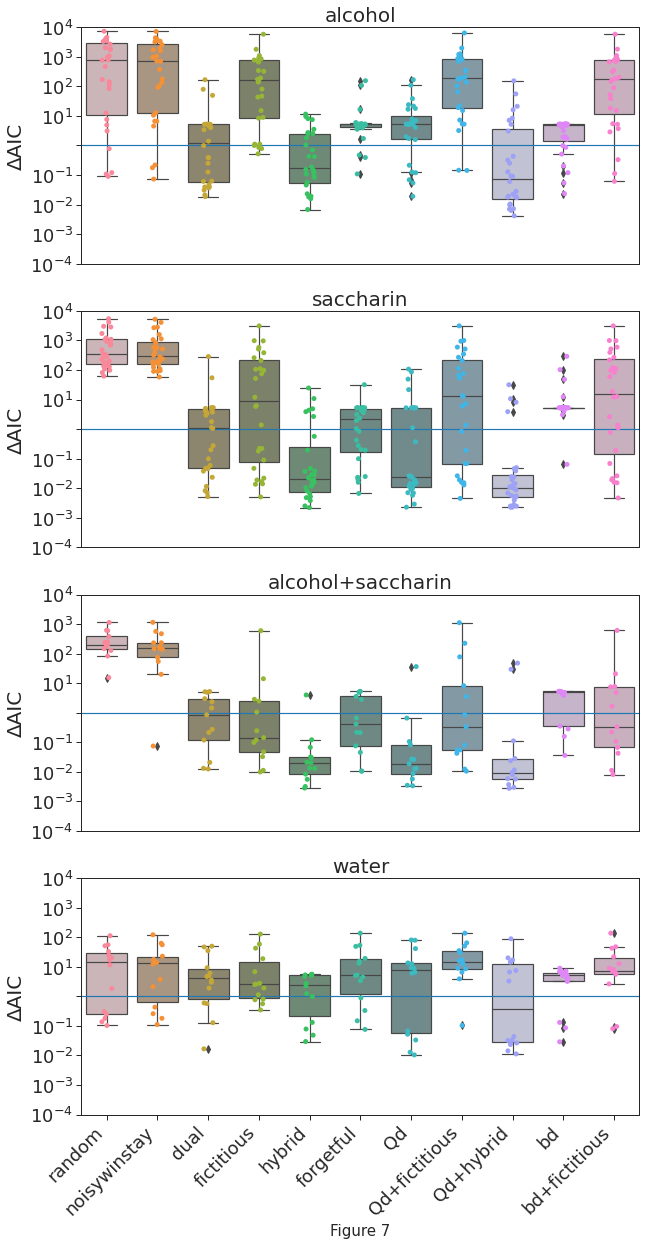

In [135]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharey = True, clear = True)
for ax, var in zip(axs.flat, substance_list):
    sns.set_style("ticks")
    sns.set_context()
    sns.boxplot(data = df_melt[df_melt.substance == var],
                ax=ax,
                saturation=0.2,
                x = "type",
                y = "arcsin").axhline(0)
    sns.stripplot(data = df_melt[df_melt.substance == var],
                ax=ax,
                x = "type",
                y = "arcsin").set_xticklabels(ax.get_xticklabels(),rotation = 45, ha = 'right')
    ax.set_title(var, fontsize = 20)
    ax.axes.xaxis.set_visible(False)
    ax.set_ylabel('ΔAIC', fontsize = 20.0)

plt.ylim(-8,8) 
ax.axes.xaxis.set_visible(True)
ax.set_xlabel('Figure 7', fontsize = 15)
plt.xticks(fontsize=18)
plt.locator_params(axis='y', nbins=9)
plt.ylim(-8, 8)
y_value = ['10$^{-4}$','10$^{-3}$','10$^{-2}$','10$^{-1}$', '',
           '10$^{1}$', '10$^{2}$', '10$^{3}$', '10$^{4}$']
ax.set_yticklabels(y_value)
#plt.rc('ytick', labelsize=18) 